<a href="https://colab.research.google.com/github/ssooyaa/New_IT_marketing/blob/main/%EB%A7%88%EC%BC%80%ED%8C%85_LSTM_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사전만들기

In [ ]:
!git clone https://github.com/lovit/customized_konlpy.git

Cloning into 'customized_konlpy'...
remote: Enumerating objects: 618, done.
remote: Total 618 (delta 0), reused 0 (delta 0), pack-reused 618
Receiving objects: 100% (618/618), 950.06 KiB | 15.32 MiB/s, done.
Resolving deltas: 100% (345/345), done.


In [ ]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 881 kB 11.2 MB/s 
     |████████████████████████████████| 453 kB 61.5 MB/s 
     |████████████████████████████████| 19.4 MB 26.4 MB/s 


In [ ]:
from google.colab import files
myfile = files.upload()

Saving 단어 사전.xlsx to 단어 사전.xlsx


In [ ]:
import pandas as pd
data_df = pd.read_excel('/content/단어 사전.xlsx') 
data_df = data_df[['name']]
data_df = data_df.dropna()
data_df

,name
0,아이폰
1,아이패드
2,애플워치
3,홍미노트
4,샤오미
...,...
111,번인
112,호갱
113,망성비
114,스냅드래곤


In [ ]:
from ckonlpy.tag import Twitter
twitter = Twitter()
for i in range(len(data_df['name'])):
  twitter.add_dictionary(data_df['name'][i], 'Noun')

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
Twitter().add_dictionary(['는데','은데','한데','긴한데','음','슴','셈','때메','땜에','니까'], 'Josa')

In [ ]:
twitter.pos('메종키츠네')

[('메종키츠네', 'Noun')]

데이터 불러오기

In [ ]:
from google.colab import files
myfile = files.upload()

Saving 리뷰_데이터_최종.xlsx to 리뷰_데이터_최종.xlsx


In [ ]:
import pandas as pd
data_df = pd.read_excel('/content/리뷰_데이터_최종.xlsx') 
data_df = data_df[['label','comment']]
data_df = data_df.dropna()
data_df

,label,comment
0,0,메종키츠네 테마 폴드3에서는 적용 불가네요;;; 제일 비싼 라인업에서 사용 불가라니...
1,1,진짜 너무 이쁘다
2,1,아 너무 예쁘당
3,1,"솔직히 이거는 돈 하나도 안아까울듯 브랜드 이미지만 있어도 충분히 감성적일텐데, ..."
4,1,진짜 너무 예쁘네요ㅠㅠ 워치랑 버즈도 이쁜데 폰 테마 진짜 대박. 너무 이뻐요.
...,...,...
34167,0,휴대폰이 휴대성이 떨어짐. 무겁고 크고
34168,0,개비싸다 끝
34169,2,스펙만 보면 사고싶지만 디자인과 특히 색깔....이 구려요.. 그레이 대체;;
34170,0,매력이 없음. s10 때는 펀치홀에 온스크린 지문인식이 센세이션이엇는데 s20은 카...


In [ ]:
data_df = data_df.drop_duplicates(['comment'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34172 entries, 0 to 34171
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    34172 non-null  int64 
 1   comment  34172 non-null  object
dtypes: int64(1), object(1)
memory usage: 800.9+ KB


In [ ]:
from google.colab import files
myfile = files.upload()

Saving korean_stopword.csv to korean_stopword.csv


In [ ]:
k_stopword = pd.read_csv('/content/korean_stopword.csv')
# list(): 
stopword = list(k_stopword['불용어'])+['을','은','를','이가','과','의',
                                    '는','에','의','가','이','은','들',
                                    '는','좀','잘','걍','과','도','를',
                                    '을','으로','자', '에','와','한',
                                    '하다','있다','되다','에서']
stopword[:5]

['이', '있', '하', '것', '들']

In [ ]:
data_df['comment'] = data_df['comment'].str.replace("[^a-zA-Zㄱ-ㅣ가-힣0-9 ]","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
from konlpy.tag import Okt
twitter = Twitter()

morphs_lst = []
for i in data_df.index:
    #morphs = []
    morphs = ""
    morph = twitter.morphs(data_df.loc[i]['comment'], stem=True)
    for txt in morph:
      if txt not in stopword:
        #morphs.append(txt)
        morphs = morphs + " " + txt
    morphs_lst.append(morphs)
data_df['morphs'] = morphs_lst
data_df.head()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


,label,comment,morphs
0,0,메종키츠네 테마 폴드3에서는 적용 불가네요 제일 비싼 라인업에서 사용 불가라니 당황스럽네,메종 키츠네 테마 폴드 3 에서는 적용 불가 네 제일 비싸다 라인업 사용 불가라 ...
1,1,진짜 너무 이쁘다,진짜 너무 이쁘다
2,1,아 너무 예쁘당,아 너무 예쁘다
3,1,솔직히 이거는 돈 하나도 안아까울듯 브랜드 이미지만 있어도 충분히 감성적일텐데 디...,솔직 히 돈 아깝다 브랜드 이미지 만 어도 충분 히 감 성적 일텐데 디테일 장난 ...
4,1,진짜 너무 예쁘네요ㅠㅠ 워치랑 버즈도 이쁜데 폰 테마 진짜 대박 너무 이뻐요,진짜 너무 예쁘다 ㅠㅠ 워치 랑 버즈 이쁘다 폰 테마 진짜 대박 너무 이쁘다


In [ ]:
sum(data_df.isnull().any())

0

In [ ]:
from sklearn.model_selection import train_test_split

X = data_df['morphs']
y = data_df['label']
X_train , X_test, y_train , y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
print('학습 데이터의 수 :',X_train.shape[0] , '테스트 데이터의 수 :',X_test.shape[0] )

학습 데이터의 수 : 27337 테스트 데이터의 수 : 6835


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
len(tokenizer.index_word)

18879

In [ ]:
X_train.shape

(27337,)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", \
      (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 18879
등장 빈도가 1번 이하인 희귀 단어의 수: 7884
단어 집합에서 희귀 단어의 비율: 41.76068647703798
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.2713832339964393


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 10997


In [ ]:
vocab_size

10997

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
tokenizer.word_index

{'OOV': 1,
 '좋다': 2,
 '보다': 3,
 '같다': 4,
 '너무': 5,
 '없다': 6,
 '사용': 7,
 '하고': 8,
 '들다': 9,
 '자다': 10,
 '다': 11,
 '쓰다': 12,
 '이다': 13,
 '배송': 14,
 '받다': 15,
 '구매': 16,
 '만': 17,
 '지만': 18,
 '제품': 19,
 '않다': 20,
 '삼성': 21,
 '오다': 22,
 '해서': 23,
 '진짜': 24,
 '게': 25,
 '프로': 26,
 '만족': 27,
 '가격': 28,
 '사다': 29,
 '버즈': 30,
 '갤럭시': 31,
 '폰': 32,
 '노트북': 33,
 '디자인': 34,
 '히': 35,
 '니': 36,
 '싶다': 37,
 '이쁘다': 38,
 '기능': 39,
 '가다': 40,
 '빠르다': 41,
 '정말': 42,
 '아이폰': 43,
 '네': 44,
 '크다': 45,
 '인': 46,
 '애플': 47,
 '서': 48,
 '예쁘다': 49,
 '많이': 50,
 '써다': 51,
 '성능': 52,
 '못': 53,
 '화면': 54,
 '그냥': 55,
 '케이스': 56,
 '이라': 57,
 '되어다': 58,
 '나오다': 59,
 '라': 60,
 '느낌': 61,
 '안되다': 62,
 '이어폰': 63,
 '이번': 64,
 '넘다': 65,
 'ㅠㅠ': 66,
 '음질': 67,
 '그렇다': 68,
 '보고': 69,
 '많다': 70,
 '아쉽다': 71,
 'ㅎㅎ': 72,
 '배터리': 73,
 '주문': 74,
 '색상': 75,
 '인데': 76,
 '바로': 77,
 '카메라': 78,
 '면서': 79,
 '그리': 80,
 '고민': 81,
 '괜찮다': 82,
 '아': 83,
 '가볍다': 84,
 '아주': 85,
 '끄다': 86,
 '워치': 87,
 '늘다': 88,
 '구입': 89,
 '기': 90,
 '불편': 91,
 '

문서의 최대 길이 : 769
문서의 평균 길이 : 22.683981417126972


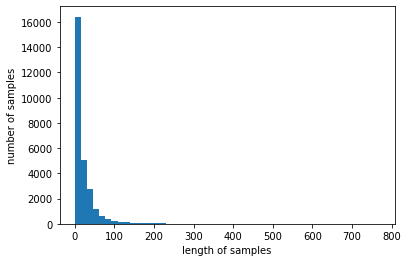

In [ ]:
import matplotlib.pyplot as plt

print('문서의 최대 길이 :',max(len(l) for l in X_train))
print('문서의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%\
          (max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 150
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 150 이하인 샘플의 비율: 98.73797417419614


In [ ]:
from tensorflow.keras.preprocessing import sequence

print('시퀀스 패딩(sample * time)')
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)
print('X_train 크기 :',X_train.shape)
print('X_test 크기 : ', X_test.shape)

시퀀스 패딩(sample * time)
X_train 크기 : (27337, 150)
X_test 크기 :  (6835, 150)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam,RMSprop
model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = 128))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

opt = RMSprop(lr=0.0001)
model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1407616   
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         131584    
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                20608     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 검증 데이터 손실(val_loss)이 증가하면, 
# 과적합 징후므로 검증 데이터 손실이 4회 증가하면 
# 학습을 조기 종료(Early Stopping)합니다. 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# ModelCheckpoint를 사용하여 검증 데이터의 
# 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint('best_model_LSTM.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, callbacks=[es,mc], validation_data = (X_test, y_test))

Epoch 1/50
854/855 [============================>.] - ETA: 0s - loss: 0.8934 - acc: 0.6170
Epoch 1: val_acc improved from -inf to 0.69466, saving model to best_model_LSTM.h5
855/855 [==============================] - 22s 20ms/step - loss: 0.8934 - acc: 0.6171 - val_loss: 0.7475 - val_acc: 0.6947
Epoch 2/50
853/855 [============================>.] - ETA: 0s - loss: 0.7119 - acc: 0.7200
Epoch 2: val_acc improved from 0.69466 to 0.74674, saving model to best_model_LSTM.h5
855/855 [==============================] - 16s 19ms/step - loss: 0.7118 - acc: 0.7201 - val_loss: 0.6624 - val_acc: 0.7467
Epoch 3/50
852/855 [============================>.] - ETA: 0s - loss: 0.6428 - acc: 0.7505
Epoch 3: val_acc did not improve from 0.74674
855/855 [==============================] - 16s 18ms/step - loss: 0.6427 - acc: 0.7504 - val_loss: 0.6599 - val_acc: 0.7457
Epoch 4/50
852/855 [============================>.] - ETA: 0s - loss: 0.6123 - acc: 0.7634
Epoch 4: val_acc improved from 0.74674 to 0.75962, s

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
loaded_model_LSTM = load_model('best_model_LSTM.h5')

loaded_model_LSTM.evaluate(X_test,y_test)

214/214 [==============================] - 2s 8ms/step - loss: 0.6181 - acc: 0.7678


[0.618083119392395, 0.7678127288818359]

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
loaded_model_LSTM = load_model('best_model_LSTM.h5')
news_label = ['부정','긍정','중립']

def sentiment_predict_LSTM(new_sentence):
  new_sentence = twitter.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model_LSTM.predict(pad_new) # 예측
  maximum = np.argmax(score)
  print(f'해당 리뷰는 {news_label[maximum]}입니다.')


In [ ]:
sentiment_predict_LSTM('디자인은 예쁜데... 배터리가')

해당 리뷰는 부정입니다.


In [ ]:
sentiment_predict_LSTM('에어팟 프로는 음질이 그렇게 좋진 않네 고민이다 근데 확실히 노켄은 인정한다')

해당 리뷰는 긍정입니다.


In [ ]:
sentiment_predict_LSTM('아 색깔 너무 예쁘다 이번에 꼭 사전예약해서 사야지')

해당 리뷰는 긍정입니다.


In [ ]:
def sentiment_predict_LSTM2(new_sentence):
  new_sentence = twitter.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model_LSTM.predict(pad_new) 
  maximum = np.argmax(score)
  per = int(np.max(score)*100)
  print(f'해당 리뷰는 {per}% 확률로 {news_label[maximum]}입니다.')

In [ ]:
sentiment_predict_LSTM2('디자인은 예쁜데... 배터리가')

해당 리뷰는 52% 확률로 부정입니다.


In [ ]:
sentiment_predict_LSTM2('에어팟 프로는 음질이 그렇게 좋진 않네 고민이다 근데 확실히 노켄은 인정한다')

해당 리뷰는 47% 확률로 긍정입니다.


In [ ]:
sentiment_predict_LSTM2('아 색깔 너무 예쁘다 이번에 꼭 사전예약해서 사야지')

해당 리뷰는 94% 확률로 긍정입니다.


In [ ]:
def Datapredict(testdata):
  Pos = []
  Neg = []
  Mid = []
  predict = []
  k = len(testdata['comment'])
  review_label = ['0','1','2']
  for i in range(k):
    new_sentence = testdata['comment'][i]
    new_sentence = twitter.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopword]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = sequence.pad_sequences(encoded, maxlen = max_len)
    score = loaded_model_LSTM.predict(pad_new) 
    maximum = np.argmax(score)
    label = review_label[maximum]
    if label == '0':
      Neg.append(0)
    elif label == '1':
      Pos.append(1)
    else:
      Mid.append(2)
  print(f'이 기기의 긍정 비율은 {int((len(Pos)/k)*100)}입니다')
  print(f'이 기기의 부정 비율은 {int((len(Neg)/k)*100)}입니다')
  print(f'이 기기의 중립 비율은 {int((len(Mid)/k)*100)}입니다')


In [ ]:
from google.colab import files
myfile = files.upload()

Saving 테스트_리뷰_150개.xlsx to 테스트_리뷰_150개.xlsx


In [ ]:
test_set = pd.read_excel('/content/테스트_리뷰_150개.xlsx') 
test_set = test_set[['label','comment']]
test_set = test_set.dropna()
test_set = test_set.drop_duplicates(['comment'])
test_set.head()

,label,comment
0,1,오~ 확실히 개인적인 취향으로 B&O가 제일 예쁘네요 ㅋㅋ 맘에 쏙 들어요
1,0,쫒겨나기 딱이고 이동성 최악이고 민폐라는 이미지를 각인시키는 1등공신스피커네요 이런...
2,0,"제품 강력 비추합니다. 개인적으로 보스를 좋아해서 휴대용 스피커, 이어셋, 헤드셋을..."
3,1,사운드스틱4 만족스럽게 쓰고 있습니다 ㅋㅋ 모니터 양 옆에 두고 쓰기엔 참 좋더라구...
4,2,블루투스가 없는 치명적인 단점이 있지만 아이폰이나 아이패드 있으면 에어플레이로 블루...


In [ ]:
Datapredict(test_set)

이 기기의 긍정 비율은 56입니다
이 기기의 부정 비율은 43입니다
이 기기의 중립 비율은 0입니다


In [ ]:
def Datapredict2(testdata):
  Pred = []
  k = len(testdata['comment'])
  review_label = ['0','1','2']
  for i in range(k):
    new_sentence = testdata['comment'][i]
    new_sentence = twitter.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopword]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = sequence.pad_sequences(encoded, maxlen = max_len)
    score = loaded_model_LSTM.predict(pad_new) 
    maximum = np.argmax(score)
    label = review_label[maximum]
    Pred.append(label)
  testdata['Pred'] = Pred
  testdata = testdata[['comment','label','Pred']]
  testdata.to_excel('/content/테스트_리뷰_150개_pred.xlsx')

In [ ]:
Datapredict2(test_set)

In [ ]:
Datapredict(test_set)

이 기기의 긍정 비율은 56입니다
이 기기의 부정 비율은 43입니다
이 기기의 중립 비율은 0입니다


OKT 이용 LSTM

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,183 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,550 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [3,005 kB]
Ign:13 https://developer.download.nvidia.com/compute/machi

In [ ]:
data_df.head()

,label,comment
0,0,메종키츠네 테마 폴드3에서는 적용 불가네요;;; 제일 비싼 라인업에서 사용 불가라니...
1,1,진짜 너무 이쁘다
2,1,아 너무 예쁘당
3,1,"솔직히 이거는 돈 하나도 안아까울듯 브랜드 이미지만 있어도 충분히 감성적일텐데, ..."
4,1,진짜 너무 예쁘네요ㅠㅠ 워치랑 버즈도 이쁜데 폰 테마 진짜 대박. 너무 이뻐요.


In [ ]:
from konlpy.tag import Okt
okt = Okt()

morphs_lst = []
for i in data_df.index:
    #morphs = []
    morphs = ""
    morph = okt.morphs(data_df.loc[i]['comment'], stem=True)
    for txt in morph:
      if txt not in stopword:
        #morphs.append(txt)
        morphs = morphs + " " + txt
    morphs_lst.append(morphs)
data_df['morphs'] = morphs_lst
data_df.head()

,label,comment,morphs
0,0,메종키츠네 테마 폴드3에서는 적용 불가네요;;; 제일 비싼 라인업에서 사용 불가라니...,메종 키츠네 테마 폴드 3 에서는 적용 불가 네 ;;; 제일 비싸다 라인업 사용 ...
1,1,진짜 너무 이쁘다,진짜 너무 이쁘다
2,1,아 너무 예쁘당,아 너무 예쁘다
3,1,"솔직히 이거는 돈 하나도 안아까울듯 브랜드 이미지만 있어도 충분히 감성적일텐데, ...","솔직하다 돈 아깝다 브랜드 이미지 만 충분하다 감성 일텐데 , 디테일 장난없다"
4,1,진짜 너무 예쁘네요ㅠㅠ 워치랑 버즈도 이쁜데 폰 테마 진짜 대박. 너무 이뻐요.,진짜 너무 예쁘다 ㅠㅠ 워치 랑 버즈 이쁘다 폰 테마 진짜 대박 . 너무 이쁘다 .


In [ ]:
from sklearn.model_selection import train_test_split

X = data_df['morphs']
y = data_df['label']
X_train , X_test, y_train , y_test = train_test_split(X, y,test_size=0.2)

In [ ]:
print('학습 데이터의 수 :',X_train.shape[0] , '테스트 데이터의 수 :',X_test.shape[0] )

학습 데이터의 수 : 27337 테스트 데이터의 수 : 6835


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
len(tokenizer.index_word)

18044

In [ ]:
X_train.shape

(27337,)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", \
      (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 18044
등장 빈도가 1번 이하인 희귀 단어의 수: 7556
단어 집합에서 희귀 단어의 비율: 41.87541565063179
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3248911558781087


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 10490


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size

10490

In [ ]:
len(tokenizer.word_index)

18045

문서의 최대 길이 : 1029
문서의 평균 길이 : 20.862237992464426


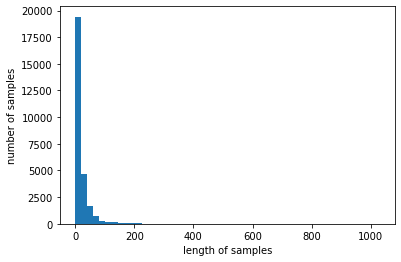

In [ ]:
import matplotlib.pyplot as plt

print('문서의 최대 길이 :',max(len(l) for l in X_train))
print('문서의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%\
          (max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 150
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 150 이하인 샘플의 비율: 98.97940520174123


In [ ]:
from tensorflow.keras.preprocessing import sequence

print('시퀀스 패딩(sample * time)')
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)
print('X_train 크기 :',X_train.shape)
print('X_test 크기 : ', X_test.shape)

시퀀스 패딩(sample * time)
X_train 크기 : (27337, 150)
X_test 크기 :  (6835, 150)


In [ ]:
X_train , X_val , y_train , y_val = train_test_split(X_train, y_train,test_size=0.2)

In [ ]:
print(len(X_train),len(X_val))

21869 5468


In [ ]:
print(len(y_train),len(y_val))

21869 5468


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam,RMSprop
model = Sequential()

model.add(Embedding(input_dim = vocab_size, output_dim = 128))
model.add(LSTM(128, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

opt = RMSprop(lr=0.0001)
model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         1342720   
                                                                 
 lstm_4 (LSTM)               (None, None, 128)         131584    
                                                                 
 dropout_4 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                20608     
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 검증 데이터 손실(val_loss)이 증가하면, 
# 과적합 징후므로 검증 데이터 손실이 4회 증가하면 
# 학습을 조기 종료(Early Stopping)합니다. 
es = EarlyStopping(monitor='val_loss', 
                   mode='min', verbose=1, patience=10)
# ModelCheckpoint를 사용하여 검증 데이터의 
# 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint('best_model_LSTM2.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)

In [ ]:
history2 = model.fit(X_train, y_train, epochs=50, callbacks=[es,mc], validation_data = (X_val, y_val))

Epoch 1/50
683/684 [============================>.] - ETA: 0s - loss: 0.9432 - acc: 0.5917
Epoch 1: val_acc improved from -inf to 0.60004, saving model to best_model_LSTM2.h5
684/684 [==============================] - 18s 22ms/step - loss: 0.9433 - acc: 0.5917 - val_loss: 0.8824 - val_acc: 0.6000
Epoch 2/50
682/684 [============================>.] - ETA: 0s - loss: 0.8051 - acc: 0.6584
Epoch 2: val_acc improved from 0.60004 to 0.71982, saving model to best_model_LSTM2.h5
684/684 [==============================] - 14s 21ms/step - loss: 0.8050 - acc: 0.6583 - val_loss: 0.7055 - val_acc: 0.7198
Epoch 3/50
683/684 [============================>.] - ETA: 0s - loss: 0.6988 - acc: 0.7286
Epoch 3: val_acc improved from 0.71982 to 0.74451, saving model to best_model_LSTM2.h5
684/684 [==============================] - 13s 18ms/step - loss: 0.6988 - acc: 0.7286 - val_loss: 0.6627 - val_acc: 0.7445
Epoch 4/50
683/684 [============================>.] - ETA: 0s - loss: 0.6481 - acc: 0.7498
Epoch 4: 

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
loaded_model_LSTM = load_model('best_model_LSTM2.h5')

loaded_model_LSTM.evaluate(X_test,y_test)

214/214 [==============================] - 2s 8ms/step - loss: 0.6101 - acc: 0.7599


[0.6100675463676453, 0.7599121928215027]

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
loaded_model_LSTM = load_model('best_model_LSTM2.h5')
news_label = ['부정','긍정','중립']

def sentiment_predict_LSTM_okt(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model_LSTM.predict(pad_new) # 예측
  maximum = np.argmax(score)
  print(f'해당 리뷰는 {news_label[maximum]}입니다.')

In [ ]:
sentiment_predict_LSTM_okt('디자인은 예쁜데... 배터리가')

해당 리뷰는 부정입니다.


In [ ]:
sentiment_predict_LSTM_okt('에어팟 프로는 음질이 그렇게 좋진 않네 고민이다 근데 확실히 노켄은 인정한다')

해당 리뷰는 긍정입니다.


In [ ]:
def sentiment_predict_LSTM_okt(new_sentence):
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopword] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = loaded_model_LSTM.predict(pad_new) 
  maximum = np.argmax(score)
  per = int(np.max(score)*100)
  print(f'해당 리뷰는 {per}% 확률로 {news_label[maximum]}입니다.')